## Python For Machine Learning Fall 2025
---
# Survey-1 (Help Us Balance This Course!) Analysis

This notebook analyzes, visualizes, and summarizes the results of our first survey. These findings will offer some insight into your expectations for this course.

### 1. Load the Data

The data is loaded from a cleaned `CSV` file containing no personal information. It is then stored in a dictionary where each column name from the file serves as a key, and the value is a list of all answers in that column.

In [1]:
import csv

data_dict = {}

with open('./Help Us Balance This Course.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)

    # Initialize dictionary with headers as keys and empty lists as values
    for col_name in header:
        data_dict[col_name] = []

    # Read the remaining rows and append data to the corresponding column lists
    for row in reader:
        for i, value in enumerate(row):
            data_dict[header[i]].append(value)

for col_name, col_data in data_dict.items():
    print(f"{col_name}: {col_data[:5]}")

section: ['F25-CS4771-01 202510 48912', 'F25-CS4771-01 202510 48912', 'F25-CS4771-01 202510 48912', 'F25  CS5771-71 202510 49977', 'F25-CS4771-01 202510 48912']
section_id: ['40373', '40373', '40373', '40178', '40373']
section_sis_id: ['202510_48912', '202510_48912', '202510_48912', '202510_49977', '202510_48912']
1641685: What percentage of the course do you think should be focused on mathematical theory (like formulas and proofs) versus practical application (like coding, examples, and hands-on projects)?: ['I am fine with whatever.', '25% Math / 75% Application', '10% Math / 90% Application', '25% Math / 75% Application', '10% Math / 90% Application']
1641686: How comfortable are you with math right now?: ['Very comfortable, bring on the equations!', 'Pretty confident.', "Neutral, I'm okay with it.", 'I don’t care because I close my eyes whenever I see an equation.', "Neutral, I'm okay with it."]
1641687: Besides math, what is one thing you would like to see MORE of in this course? 

### 2. View Question 1

We can use a histogram to see the distribution of the voting results. Creating a histogram in Python is simple and straightforward. Specifically, we use `matplotlib` to create the histogram and `Counter` from `collections` to count the frequency of each selection.

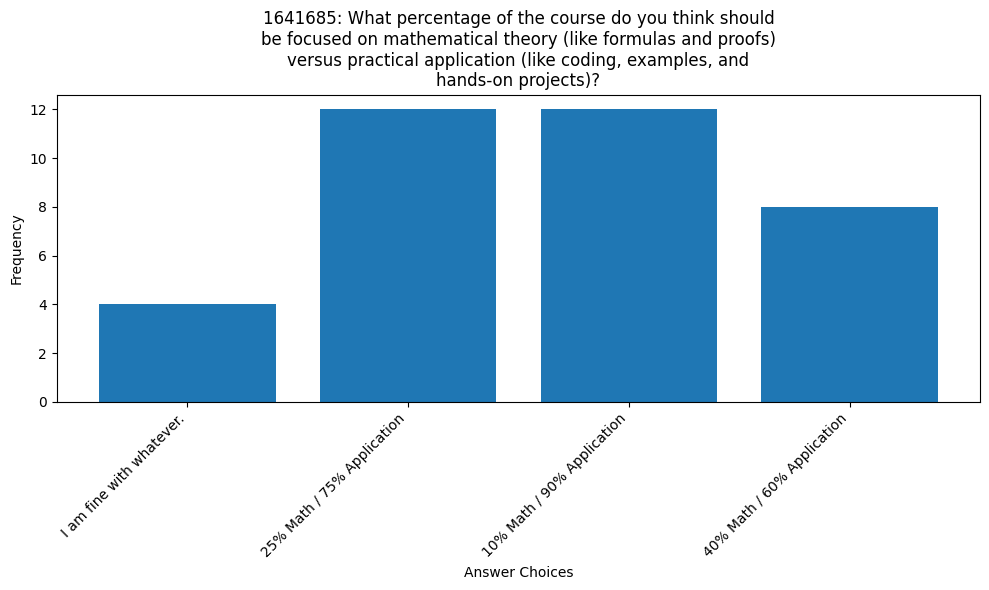

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap


question_key = '1641685: What percentage of the course do you think should be focused on mathematical theory (like formulas and proofs) versus practical application (like coding, examples, and hands-on projects)?'
answers = data_dict[question_key]

# Count the occurrences of each answer
answer_counts = Counter(answers)

# Get the answer choices and their frequencies
answer_choices = list(answer_counts.keys())
frequencies = list(answer_counts.values())

# Wrap the title text
wrapped_title = textwrap.fill(question_key, width=60) # Adjust width as needed

# Create a bar chart (histogram-like representation)
plt.figure(figsize=(10, 6))
plt.bar(answer_choices, frequencies)
plt.title(wrapped_title)  # Use the wrapped title
plt.xlabel('Answer Choices')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Visualize Question 2
We will use the same method to visualize the selections for Question 2.

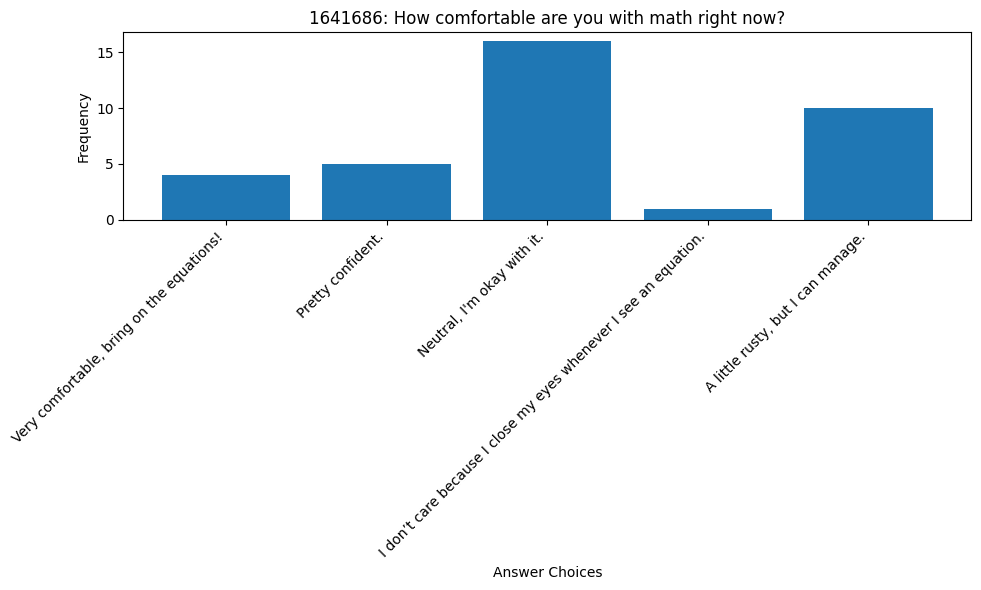

In [8]:
question_key = '1641686: How comfortable are you with math right now?'
answers = data_dict[question_key]

# Count the occurrences of each answer
answer_counts = Counter(answers)

# Get the answer choices and their frequencies
answer_choices = list(answer_counts.keys())
frequencies = list(answer_counts.values())

# Wrap the title text
wrapped_title = textwrap.fill(question_key, width=60) # Adjust width as needed

# Create a bar chart (histogram-like representation)
plt.figure(figsize=(10, 6))
plt.bar(answer_choices, frequencies)
plt.title(wrapped_title)  # Use the wrapped title
plt.xlabel('Answer Choices')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Analyze the Answers to Question 3

Analyzing essay answers is a complex task that requires Natural Language Processing (NLP) techniques. For now, we will use a Large Language Model (LLM) to perform the work.

In [28]:
!pip install -q google-generativeai

In [29]:
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

In [30]:
user_secrets = UserSecretsClient()
gemini_key = user_secrets.get_secret("GEMINI_API_KEY")

In [31]:
genai.configure(api_key=gemini_key)
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [34]:
prompt = f"""
Analyze the comments of each student survey in the following list.
For each review, summarize the ideas the student proposed.
Output all requests and how many times they were mentioned.

Reviews:
{str(data_dict[list(data_dict.keys())[-2]])}
"""
response = model.generate_content(prompt)

print(response.text)

Here's a breakdown of the student feedback and requests:

**Summary of Ideas and Requests:**

* **Coding Labs/Practical Application/Hands-on Coding:**  Students overwhelmingly desire more coding labs and opportunities to apply the concepts practically. They want to work with real-world datasets, clean data, build models, and see how the code connects to the underlying math. Some suggest in-class coding walkthroughs and mini-assignments.  Several students emphasize the importance of practice for solidifying their understanding.
* **Real-World Case Studies/Examples/Applications:** Many students request real-world examples and case studies to understand how machine learning is used in practice.  They want to see concrete applications of algorithms and techniques, not just theoretical explanations. Some suggest focusing on well-known or widely used applications.
* **Group Projects:** Opinion is divided on group projects. Some students find them valuable for collaboration experience, while 